### Keertana V. Chidambaram <br/> Econ PS3 - OGM

#### Exercise 2.1

In [1]:
import numpy as np
from scipy.optimize import least_squares
# Parameters
beta = 0.442
delta = 0.6415
sigma = 3
A = 1
alpha = 0.35
nvec = [1, 1, 0.2]
f_params = [nvec, A, alpha, delta]
SS_tol = 1e-4

In [90]:
# Helper functions
def get_w(alpha, A, L, K):
    return (1 - alpha) * A * (K / L) ** alpha
def get_r(alpha, delta, A, L, K):
    return alpha * A * (L / K) ** (1 - alpha) - delta
def get_K(bvec):
    return sum(bvec)
def get_L(nvec):
    return sum(nvec)
def get_Y(A, K, alpha, L):
    return A * (K ** alpha) * (L ** (1 - alpha))
def get_c1(nvec, w, bvec):
    return w * nvec[0] - bvec[0]
def get_c2(nvec, w, bvec, r):
    return w * nvec[1] + (1 + r) * bvec[0] - bvec[1]
def get_c3(nvec, w, bvec, r):
    return w * nvec[2] + (1 + r) * bvec[1]
def u(c, sigma):
    return (c ** (1 - sigma) - 1) / (1 - sigma)
def u_dash(c, sigma):
    return c ** -sigma
def get_C(cvec):
    return sum(cvec)
def get_euerr(cvec, beta, r, sigma):
    return u_dash(cvec[0], sigma) - beta * (1 + r) * u_dash(cvec[1], sigma)
def get_rcerr(Y, C, delta, Kt, Ktp1):
    return Y - C - Ktp1 + (1 - delta) * Kt

In [3]:
def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    K = get_K(bvec_guess)
    L = get_L(nvec)
    K_cnstr = bool(K <= 0)
    w = get_w(alpha, A, L, K)
    r = get_r(alpha, delta, A, L, K)
    c1 = get_c1(nvec, w, bvec_guess)
    c2 = get_c2(nvec, w, bvec_guess, r)
    c3 = get_c3(nvec, w, bvec_guess, r)
    c_cnstr = np.array([bool(c1 <= 0), bool(c2 <= 0), bool(c3 <= 0)])
    b_cnstr = [False, False]
    if c_cnstr[0]:
        b_cnstr[0] = True
    if c_cnstr[1]:
        b_cnstr[0] = True
        b_cnstr[1] = True
    if c_cnstr[2]:
        b_cnstr[1] = True
    return b_cnstr, c_cnstr, K_cnstr

In [4]:
bvec_guess = np.array([1.0, 1.2])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print('b_cnstr= ', b_cnstr)
print('c_cnstr= ', c_cnstr)
print('K_cnstr= ', K_cnstr)

b_cnstr=  [True, False]
c_cnstr=  [ True False False]
K_cnstr=  False


b2 guess is not feasible!

In [5]:
bvec_guess = np.array([0.06, -0.001])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print('b_cnstr= ', b_cnstr)
print('c_cnstr= ', c_cnstr)
print('K_cnstr= ', K_cnstr)

b_cnstr=  [False, False]
c_cnstr=  [False False False]
K_cnstr=  False


This guess is feasible!

In [6]:
bvec_guess = np.array([0.1, 0.1])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print('b_cnstr= ', b_cnstr)
print('c_cnstr= ', c_cnstr)
print('K_cnstr= ', K_cnstr)

b_cnstr=  [False, False]
c_cnstr=  [False False False]
K_cnstr=  False


This guess is feasible!

#### Exercise 2.2

In [7]:
import time
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [8]:
params = [beta, sigma, nvec, A, alpha, delta, SS_tol]

def solver2(bvec_guess, params):
    beta, sigma, nvec, A, alpha, delta, SS_tol = params
    L = get_L(nvec)
    K = get_K(bvec_guess)
    w = get_w(alpha, A, L, K)
    r = get_r(alpha, delta, A, L, K)
    c1 = get_c1(nvec, w, bvec_guess)
    c2 = get_c2(nvec, w, bvec_guess, r)
    c3 = get_c3(nvec, w, bvec_guess, r)
    eq1 = get_euerr([c1, c2], beta, r, sigma)
    eq2 = get_euerr([c2, c3], beta, r, sigma)
    return (eq1, eq2)

def get_SS(params, bvec_guess, SS_graphs):
    beta, sigma, nvec, A, alpha, delta, SS_tol = params
    L = get_L(nvec)

    start_time = time.clock()
    b_ss = fsolve(solver2, bvec_guess, args=params)
    ss_time = time.clock()
    K_ss = get_K(b_ss)
    w_ss = get_w(alpha, A, L, K_ss)
    r_ss = get_r(alpha, delta, A, L, K_ss)

    c1_ss = get_c1(nvec, w_ss, b_ss)
    c2_ss = get_c2(nvec, w_ss, b_ss, r_ss)
    c3_ss = get_c3(nvec, w_ss, b_ss, r_ss)
    c_ss = [c1_ss, c2_ss, c3_ss]
    C_ss = get_C(c_ss)

    Y_ss = get_Y(A, K_ss, alpha, L)
    
    err1 = get_euerr([c1_ss, c2_ss], beta, r_ss, sigma)
    err2 = get_euerr([c2_ss, c3_ss], beta, r_ss, sigma)
    EulErr_ss = [err1, err2]
    RCerr_ss = get_rcerr(Y_ss, C_ss, delta, K_ss, K_ss)
    

    ss_output = {'b_ss': b_ss, 
                 'c_ss': c_ss, 
                 'w_ss': w_ss, 
                 'r_ss': r_ss,
                 'K_ss': K_ss, 
                 'Y_ss': Y_ss, 
                 'C_ss': C_ss,
                 'EulErr_ss': EulErr_ss,
                 'RCerr_ss': RCerr_ss,
                 'ss_time': ss_time}

    #if SS_graphs:
    return ss_output
bvec_guess = [0.1, 0.1]
params = [beta, sigma, nvec, A, alpha, delta, SS_tol]
ss_output = get_SS(params, bvec_guess, False)
print(ss_output)

{'b_ss': array([0.01931253, 0.0584111 ]), 'c_ss': [0.18241212755849867, 0.20961468030898922, 0.24087386507209851], 'w_ss': 0.20172465739052575, 'r_ss': 2.433062339127069, 'K_ss': 0.07772362575316386, 'Y_ss': 0.6827603788602411, 'C_ss': 0.6329006729395864, 'EulErr_ss': [-1.3926637620897964e-12, 2.6290081223123707e-12], 'RCerr_ss': 8.326672684688674e-17, 'ss_time': 10.524100818}


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


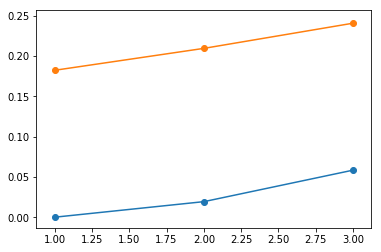

In [32]:
B = [0] + list(ss_output['b_ss'])
C = list(ss_output['c_ss'])
T = [1, 2, 3]

plt.plot(T, B)
plt.scatter(T, B)
plt.plot(T, C)
plt.scatter(T, C)         

In [33]:
beta_new = 0.55
params = [beta_new, sigma, nvec, A, alpha, delta, SS_tol]
ss_output2 = get_SS(params, bvec_guess, False)
print(ss_output2)

{'b_ss': array([0.02817692, 0.07686545]), 'c_ss': [0.1959752770144865, 0.22861594138961466, 0.26669307193992076], 'w_ss': 0.2241521959300601, 'r_ss': 1.8863765058112805, 'K_ss': 0.10504237022008017, 'Y_ss': 0.7586689708402035, 'C_ss': 0.691284290344022, 'EulErr_ss': [1.530867166366079e-08, -2.0089586882932053e-08], 'RCerr_ss': 8.326672684688674e-17, 'ss_time': 265.25231259}


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [34]:
print(ss_output)

{'b_ss': array([0.01931253, 0.0584111 ]), 'c_ss': [0.18241212755849867, 0.20961468030898922, 0.24087386507209851], 'w_ss': 0.20172465739052575, 'r_ss': 2.433062339127069, 'K_ss': 0.07772362575316386, 'Y_ss': 0.6827603788602411, 'C_ss': 0.6329006729395864, 'EulErr_ss': [-1.3926637620897964e-12, 2.6290081223123707e-12], 'RCerr_ss': 8.326672684688674e-17, 'ss_time': 10.524100818}


Savings decrease, consumption increases, wage increases, interest rate increases.

#### Exercise 2.3

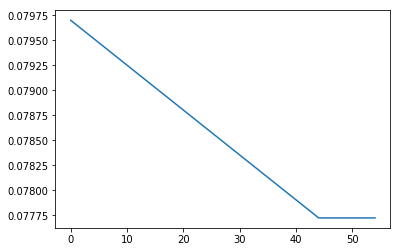

In [92]:
b_ss = ss_output['b_ss']
bvec_guess = [0.8 * b_ss[0], 1.1 * b_ss[1]]
b2_init = b_ss[0]
xi = 0.5
T = 45
eps = 1e-9
L = get_L(nvec)
Kvec = list(np.linspace(get_K(bvec_guess), get_K(b_ss), T))
b2vec = list(np.linspace(bvec_guess[0], b_ss[0], T)) + [b_ss[0]] * 10
b3vec = list(np.linspace(bvec_guess[1], b_ss[1], T)) + [b_ss[1]] * 10
#bvec = np.array([np.array(b2vec), np.array(b3vec)])
Kvec = np.array(Kvec + [sum(b_ss)] * 10)
rvec = np.array([get_r(alpha, delta, A, L, Ki) for Ki in Kvec])
wvec = np.array([get_w(alpha, A, L, Ki) for Ki in Kvec])
plt.plot(Kvec)

In [93]:
def solver3(bvec_guess, params2):
    wvec, rvec, nvec, t, beta, sigma = params2
    rt, rtp1 = rvec[t], rvec[t+1]
    wt, wtp1, wtp2 = wvec[t], wvec[t+1], wvec[t+2]
    c1 = get_c1(nvec, wt, bvec_guess)
    c2 = get_c2(nvec, wtp1, bvec_guess, rt)
    c3 = get_c3(nvec, wtp2, bvec_guess, rtp1)
    cvec = [c1, c2, c3]
    C = get_C(cvec)
    eq1 = get_euerr([c1, c2], beta, rt, sigma)
    eq2 = get_euerr([c2, c3], beta, rtp1, sigma)
    eq3 = get_K(bvec_guess) + 0.001
    return (eq1, eq2)

i = 0
errvec = []
while 1:
    print(i)
    i += 1
    b2vec_new = np.zeros(len(Kvec))
    b3vec_new = np.zeros(len(Kvec))
    b2vec_new[0] = b2vec[0]
    b3vec_new[0] = b3vec[0]
    b3vec_new[1] = b3vec[1]
    euler_err = []
    for t in range(T - 2 + 10):
        bvec_guess = (b2vec[t+1], b3vec[t+2])
        params2 = [[wvec, rvec, nvec, t, beta, sigma]]
        res = least_squares(fun=solver3, x0=bvec_guess, bounds=((0.01, 0.01), (10, 10)), args=params2)
        b2vec_new[t + 1], b3vec_new[t + 2] = res.x
        euler_err.append(max(abs(res.fun)))
    b2vec_new[T+10-1] = Kvec[T-1] - b3vec_new[T-1]
    Kvec_new = b2vec_new + b3vec_new
    err = sum((np.array(Kvec_new) - np.array(Kvec)) ** 2)
    Kvec = Kvec_new.copy()
    b2vec = b2vec_new.copy()
    b3vec = b3vec_new.copy()
    rvec = np.array([get_r(alpha, delta, A, L, Ki) for Ki in Kvec])
    wvec = np.array([get_w(alpha, A, L, Ki) for Ki in Kvec])

    errvec.append(abs(err))
    if err < eps:
        break

0
1
2
3
4
5
6
7
8
9
10
11


In [97]:
Kt = Kvec[:len(Kvec)-1]
Ktp1 = Kvec[1:]
L = get_L(nvec)
Yt = [get_Y(A, Ki, alpha, L) for Ki in Kt]
c1t = np.array([get_c1(nvec, wvec[i], bvec[:, i]) for i in range(bvec.shape[1])])
c2t = np.array([get_c2(nvec, wvec[i], bvec[:, i], rvec[i]) for i in range(bvec.shape[1])])
c3t = np.array([get_c3(nvec, wvec[i], bvec[:, i], rvec[i]) for i in range(bvec.shape[1])])
Ct = c1t + c2t + c3t
Ct = Ct[:len(Ct)-1]
const_err = [abs(get_rcerr(Yt[i], Ct[i], delta, Kt[i], Ktp1[i])) for i in range(len(Yt))]

In [99]:
print("maximum of the absolute values of all the Euler errors across the entire time path = ", max(euler_err))
print("maximum of the absolute value of all the aggregate resource constraint errors = ", max(const_err))

maximum of the absolute values of all the Euler errors across the entire time path =  9.947598300641403e-13
maximum of the absolute value of all the aggregate resource constraint errors =  0.0034734459944796535


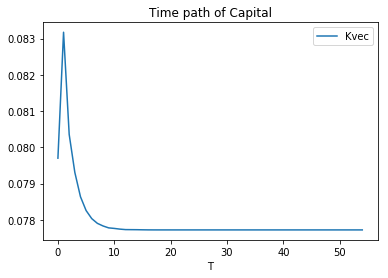

In [113]:
plt.title("Time path of Capital")
plt.plot(Kvec, label="Kvec")
plt.xlabel("T")
plt.legend()
plt.show()

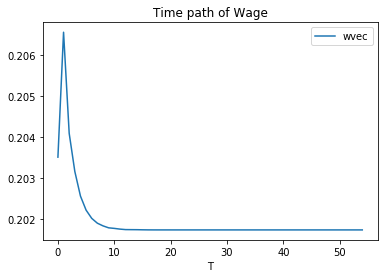

In [110]:
plt.title("Time path of Wage")
plt.plot(wvec, label="wvec")
plt.xlabel("T")
plt.legend()
plt.show()

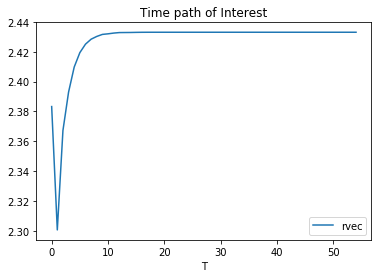

In [112]:
plt.title("Time path of Interest")
plt.plot(rvec, label="rvec")
plt.xlabel("T")
plt.legend()
plt.show()

In [117]:
(Kvec - Kvec[-1]) < 1e-5

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

It takes 12 periods for the economy to get within 0.00001 of the steady-state aggregate capital stock.

#### Exercise 3.2